<a href="https://colab.research.google.com/github/Doreen970/Data_analysis/blob/main/Copy_of_DOREENWANYAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
import io
import requests


In [ ]:
urlm = "https://open.africa/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download-21102015.xls"

# Read the Excel file from the URL into a DataFrame
response = requests.get(urlm)
excel_data = io.BytesIO(response.content)
df = pd.read_excel(excel_data)
df_Nai = df[df["County"] == "Nairobi"]

selected_val = df_Nai[["Type", "Owner", "Beds", "Constituency", "Operational Status"]]

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
# Display the DataFrame
print(selected_val.head())

              Type                                    Owner  Beds  \
1   Medical Clinic           Private Practice - Unspecified   0.0   
7    Health Centre                             Armed Forces  14.0   
10  Medical Clinic  Private Practice - General Practitioner   0.0   
11  Medical Clinic         Private Enterprise (Institution)   0.0   
12  Medical Clinic         Private Enterprise (Institution)   0.0   

   Constituency Operational Status  
1       MATHARE        Operational  
7      LANG'ATA        Operational  
10        KIBRA        Operational  
11      STAREHE        Operational  
12    WESTLANDS        Operational  


In [8]:
#file for Nairobi population
pop = "/content/nairobi.xls"

# Read the Excel file into a DataFrame
dfpop = pd.read_excel(pop)
#get only constituency and female
dfpop2 = dfpop[["Constituency", "Female", "Total"]]

#change data in Constituency column to be in uppercase
dfpop2['Constituency'] = dfpop2['Constituency'].str.upper()
print(dfpop2.head())

# Display the DataFrame


      Constituency  Female   Total
0  DAGORETTI        216526  434208
1   EMBAKASI        496270  988808
2   KAMUKUNJI       131599  268276
3   KASARANI        399385  780656
4    KIBRA           91569  185777


<ipython-input-8-fab629cd73ea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpop2['Constituency'] = dfpop2['Constituency'].str.upper()


In [9]:
merged_df = pd.merge(dfpop2, selected_val, on='Constituency')

In [10]:
print(dfpop2['Constituency'].unique())

['DAGORETTI      ' 'EMBAKASI      ' 'KAMUKUNJI     ' 'KASARANI      '
 'KIBRA        ' "LANG'ATA      " 'MAKADARA      ' 'MATHARE       '
 'NJIRU        ' 'STAREHE       ' 'WESTLANDS      ']


In [11]:
print(selected_val['Constituency'].unique())

['MATHARE' "LANG'ATA" 'KIBRA' 'STAREHE' 'WESTLANDS' 'DAGORETTI NORTH'
 'EMBAKASI EAST' 'RUARAKA' 'ROYSAMBU' 'KAMUKUNJI' 'MAKADARA' 'KASARANI'
 'EMBAKASI WEST' 'EMBAKASI CENTRAL' 'EMBAKASI SOUTH' 'EMBAKASI NORTH'
 'DAGORETTI SOUTH']


In [12]:
dfpop2['Constituency'] = dfpop2['Constituency'].replace('Njiru', 'Kasarani')

<ipython-input-12-bb46a0d998af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpop2['Constituency'] = dfpop2['Constituency'].replace('Njiru', 'Kasarani')


In [14]:
replacement_mapping = {
    'RUARAKA': 'KASARANI',
    'EMBAKASI CENTRAL': 'EMBAKASI',
    'EMBAKASI EAST': 'EMBAKASI',
    'EMBAKASI WEST': 'EMBAKASI',
    'EMBAKASI SOUTH': 'EMBAKASI',
    'EMBAKASI NORTH': 'EMBAKASI',
    'DAGORETTI SOUTH': 'DAGORETTI',
    'DAGORETTI NORTH': 'DAGORETTI',
    'ROYSAMBU': 'KASARANI',
    'MATHARE': 'KASARANI'

}
selected_val['Constituency'] = selected_val['Constituency'].replace(replacement_mapping)
print(selected_val.head())

              Type                                    Owner  Beds  \
1   Medical Clinic           Private Practice - Unspecified   0.0   
7    Health Centre                             Armed Forces  14.0   
10  Medical Clinic  Private Practice - General Practitioner   0.0   
11  Medical Clinic         Private Enterprise (Institution)   0.0   
12  Medical Clinic         Private Enterprise (Institution)   0.0   

   Constituency Operational Status  
1      KASARANI        Operational  
7      LANG'ATA        Operational  
10        KIBRA        Operational  
11      STAREHE        Operational  
12    WESTLANDS        Operational  


<ipython-input-14-ee5c53f555ed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_val['Constituency'] = selected_val['Constituency'].replace(replacement_mapping)


In [15]:
merged_df = pd.merge(dfpop2, selected_val, on='Constituency')

In [16]:
print(dfpop2.head())

      Constituency  Female   Total
0  DAGORETTI        216526  434208
1   EMBAKASI        496270  988808
2   KAMUKUNJI       131599  268276
3   KASARANI        399385  780656
4    KIBRA           91569  185777


In [17]:
dfpop2['Constituency'] = dfpop2['Constituency'].replace('NJIRU', 'KASARANI')

<ipython-input-17-1cf005adf68a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpop2['Constituency'] = dfpop2['Constituency'].replace('NJIRU', 'KASARANI')


In [18]:
dfpop2['Constituency'] = dfpop2['Constituency'].replace('MATHARE', 'KASARANI')

<ipython-input-18-196e2c8dbd2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpop2['Constituency'] = dfpop2['Constituency'].replace('MATHARE', 'KASARANI')


In [19]:
print(dfpop2['Constituency'].unique())

['DAGORETTI      ' 'EMBAKASI      ' 'KAMUKUNJI     ' 'KASARANI      '
 'KIBRA        ' "LANG'ATA      " 'MAKADARA      ' 'MATHARE       '
 'NJIRU        ' 'STAREHE       ' 'WESTLANDS      ']


In [20]:
print(selected_val['Constituency'].unique())

['KASARANI' "LANG'ATA" 'KIBRA' 'STAREHE' 'WESTLANDS' 'DAGORETTI'
 'EMBAKASI' 'KAMUKUNJI' 'MAKADARA']


In [22]:
replacement_mapping = {
    'NJIRU': 'KASARANI',
    'MATHARE': 'KASARANI'
}

# Replace multiple values at once using .loc[]
dfpop2.loc[dfpop2['Constituency'].isin(replacement_mapping.keys()), 'Constituency'] = dfpop2['Constituency'].replace(replacement_mapping)

# Display the unique values in the "Constituency" column
print(dfpop2['Constituency'].unique())



['DAGORETTI      ' 'EMBAKASI      ' 'KAMUKUNJI     ' 'KASARANI      '
 'KIBRA        ' "LANG'ATA      " 'MAKADARA      ' 'MATHARE       '
 'NJIRU        ' 'STAREHE       ' 'WESTLANDS      ']


In [23]:
# Drop rows where the "Constituency" column contains "MATHARE" or "NJIRU"
dfpop2 = dfpop2[~dfpop2['Constituency'].isin(['MATHARE', 'NJIRU'])]

# Display the DataFrame after removal
print(dfpop2['Constituency'].unique())


['DAGORETTI      ' 'EMBAKASI      ' 'KAMUKUNJI     ' 'KASARANI      '
 'KIBRA        ' "LANG'ATA      " 'MAKADARA      ' 'MATHARE       '
 'NJIRU        ' 'STAREHE       ' 'WESTLANDS      ']


In [24]:
dfpop2['Constituency'] = dfpop2['Constituency'].str.strip()

In [25]:
replacement_mapping = {
    'NJIRU': 'KASARANI',
    'MATHARE': 'KASARANI'
}

# Replace multiple values at once using .loc[]
dfpop2.loc[dfpop2['Constituency'].isin(replacement_mapping.keys()), 'Constituency'] = dfpop2['Constituency'].replace(replacement_mapping)

# Display the unique values in the "Constituency" column
print(dfpop2['Constituency'].unique())


['DAGORETTI' 'EMBAKASI' 'KAMUKUNJI' 'KASARANI' 'KIBRA' "LANG'ATA"
 'MAKADARA' 'STAREHE' 'WESTLANDS']


In [26]:
#merge the two datasets to compare data
merged_df = pd.merge(dfpop2, selected_val, on='Constituency')

In [27]:
print(merged_df.tail(12))

     Constituency  Female   Total            Type  \
1346    WESTLANDS  155021  308854  Medical Clinic   
1347    WESTLANDS  155021  308854  Medical Clinic   
1348    WESTLANDS  155021  308854  Medical Clinic   
1349    WESTLANDS  155021  308854   Health Centre   
1350    WESTLANDS  155021  308854  Medical Clinic   
1351    WESTLANDS  155021  308854      Dispensary   
1352    WESTLANDS  155021  308854      Dispensary   
1353    WESTLANDS  155021  308854  Medical Clinic   
1354    WESTLANDS  155021  308854  Medical Clinic   
1355    WESTLANDS  155021  308854  Medical Clinic   
1356    WESTLANDS  155021  308854   Health Centre   
1357    WESTLANDS  155021  308854  Medical Clinic   

                                                Owner  Beds Operational Status  
1346                   Private Practice - Unspecified   0.0        Operational  
1347                   Non-Governmental Organizations   0.0    Pending Opening  
1348                 Private Enterprise (Institution)   3.0        

In [28]:
#find only hospitals that are currently operational
merged_df = merged_df[merged_df['Operational Status'] == 'Operational']
print(merged_df.head())

  Constituency  Female   Total                      Type  \
0    DAGORETTI  216526  434208             Health Centre   
1    DAGORETTI  216526  434208             Health Centre   
2    DAGORETTI  216526  434208  VCT Centre (Stand-Alone)   
3    DAGORETTI  216526  434208             Health Centre   
4    DAGORETTI  216526  434208                Dispensary   

                                   Owner  Beds Operational Status  
0       Private Enterprise (Institution)   0.0        Operational  
1  Private Practice - Medical Specialist  10.0        Operational  
2         Non-Governmental Organizations   0.0        Operational  
3       Private Enterprise (Institution)   7.0        Operational  
4                        Local Authority   0.0        Operational  


In [31]:
#dataframe to show the total number of facilities per constituency
#import re
#merged_df['facility_count'] = merged_df.groupby(['Constituency', 'Total', 'Female', 'Beds', 'Type'])['Operational Status'].transform('count')
total_facilities = merged_df['Type'].value_counts()
#Total facilities in Nairobi
print(total_facilities.sum())



1317


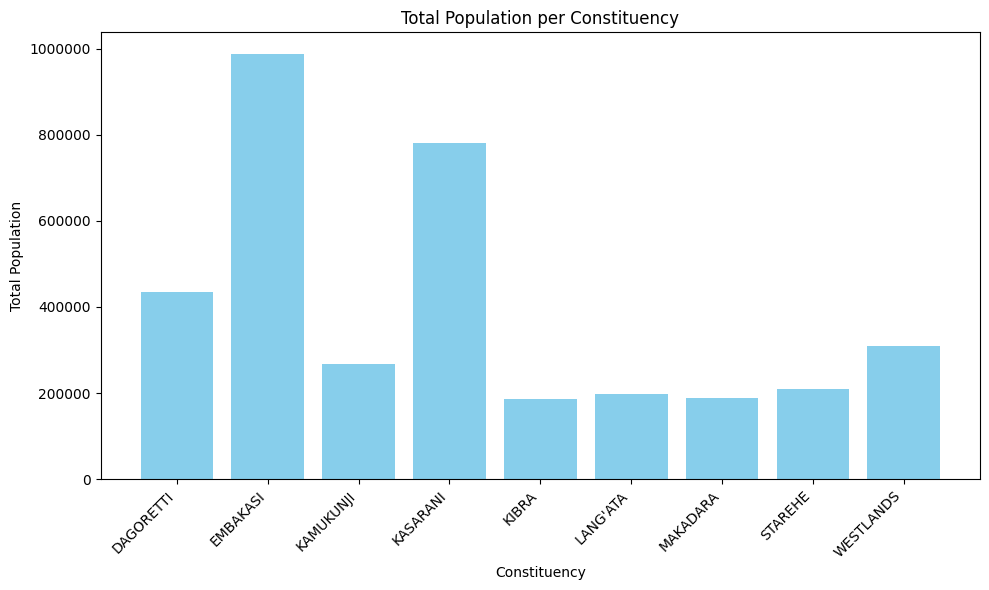

In [43]:
import matplotlib.pyplot as plt

#import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
constituencies = merged_df['Constituency']
total_population = merged_df['Total']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(constituencies, total_population, color='skyblue')

# Adding labels and title
plt.xlabel('Constituency')
plt.ylabel('Total Population')
plt.title('Total Population per Constituency')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# intervals of values in y-axis
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], [0, 200000, 400000, 600000, 800000, 1000000])

# Show plot
plt.tight_layout()
plt.show()



Constituency
DAGORETTI    105
EMBAKASI     145
KAMUKUNJI     59
KASARANI     600
KIBRA         81
LANG'ATA      68
MAKADARA      51
STAREHE      137
WESTLANDS     71
Name: Type, dtype: int64


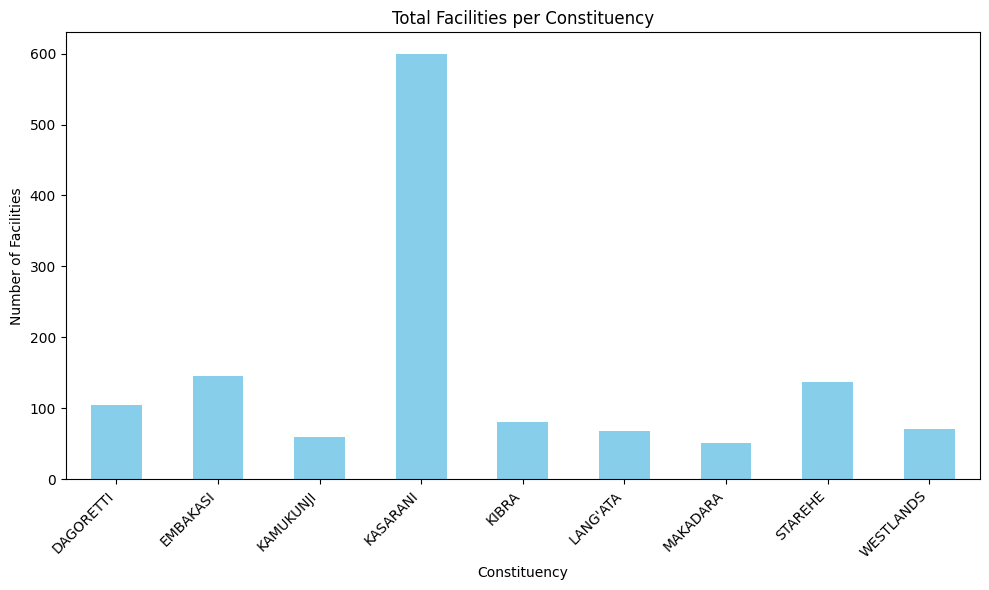

In [53]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
#population_per_constituency = merged_df.groupby('Constituency')['Total'].sum()
total_facilities_per_constituency = merged_df.groupby('Constituency')['Type'].count()
print(total_facilities_per_constituency)

plt.figure(figsize=(10, 6))
total_facilities_per_constituency.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Constituency')
plt.ylabel('Number of Facilities')
plt.title('Total Facilities per Constituency')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()




